In [4]:
import csv

with open("./data/LOCAL_PEOPLE_DONG_201912.csv", encoding="utf-8-sig") as f:
  data = csv.reader(f)
  next(data)
  data = list(data)

print(data[0])

['20191201', '00', '11215710', '45694.998800000001', '452.3937', '208.7971', '1267.7678000000001', '5642.9234999999999', '5433.6800999999996', '2494.5992999999999', '1691.4830999999999', '1042.7095999999999', '1058.3378', '895.46389999999997', '875.9212', '601.90970000000004', '496.2165', '850.68200000000002', '388.40050000000002', '180.37209999999999', '1586.7039', '6973.6175999999996', '4259.7021999999997', '2036.1446000000001', '1285.4200000000001', '794.6241', '833.71789999999999', '772.14170000000001', '773.21519999999998', '827.14549999999997', '565.53779999999995', '1405.3706999999999', '']


In [5]:
with open("./data/dong_code.csv", encoding="utf-8-sig") as f1:
  code_data = csv.reader(f1)
  next(code_data)
  next(code_data)
  code_data = list(code_data)

print(len(code_data))

424


In [6]:
for row in data:
  for i in range(1, 32):
    if i <= 2:
      row[i] = int(row[i])
    else:
      row[i] = float(row[i])

print(data[0])

['20191201', 0, 11215710, 45694.9988, 452.3937, 208.7971, 1267.7678, 5642.9235, 5433.6801, 2494.5993, 1691.4831, 1042.7096, 1058.3378, 895.4639, 875.9212, 601.9097, 496.2165, 850.682, 388.4005, 180.3721, 1586.7039, 6973.6176, 4259.7022, 2036.1446, 1285.42, 794.6241, 833.7179, 772.1417, 773.2152, 827.1455, 565.5378, 1405.3707, '']


In [7]:
for row in code_data:
  row[1] = int(row[1])

print(code_data[0])

['1101053', 11110530, 'ÏÑúÏö∏', 'Ï¢ÖÎ°úÍµ¨', 'ÏÇ¨ÏßÅÎèô']


In [5]:
dong_name = input("Ìï´ÌîåÎ†àÏù¥Ïä§Í∞Ä ÏúÑÏπòÌïú ÌñâÏ†ïÎèôÏùÑ ÏûÖÎ†•ÌïòÏÑ∏Ïöî -->")
for row in code_data:
  if row[-1] == dong_name:
    dong_code = row[1]

print(dong_name, '-', dong_code, 'ÏùÑ(Î•º)Î∂ÑÏÑùÌï©ÎãàÎã§!')

ÏïïÍµ¨Ï†ïÎèô - 11680545 ÏùÑ(Î•º)Î∂ÑÏÑùÌï©ÎãàÎã§!


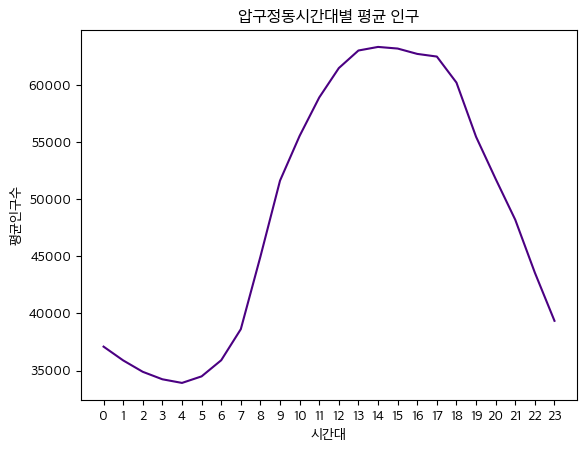

In [6]:
import matplotlib.pyplot as plt

population = [0 for i in range(24)]
for row in data:
  if row[2] == dong_code:
    time, p = row[1], row[3]
    population[time] += p

population = [p/31 for p in population]

plt.rc('font', family='Apple SD Gothic Neo')
plt.title(dong_name + 'ÏãúÍ∞ÑÎåÄÎ≥Ñ ÌèâÍ∑† Ïù∏Íµ¨')
plt.plot(range(24), population, color='indigo')
plt.xticks(range(24), range(24))
plt.xlabel('ÏãúÍ∞ÑÎåÄ')
plt.ylabel('ÌèâÍ∑†Ïù∏Íµ¨Ïàò')
plt.show()

In [7]:
import datetime

datetime.date(2019, 12, 15).weekday()

6

In [8]:
weekday = [0 for i in range(24)]
weekend = [0 for i in range(24)]

for row in data:
  if row[2] == dong_code:
    time, p = row[1], row[3]
    year, mon, day = int(row[0][:4]), int(row[0][4:6]), int(row[0][6:])
    num = datetime.date(year, mon, day).weekday()
    if num < 5:
      weekday[time] += p
    else:
      weekend[time] += p

In [9]:
# 2019ÎÖÑ 12ÏõîÏùò Ï£ºÏ§ë/Ï£ºÎßê ÏùºÏàò Íµ¨ÌïòÍ∏∞
weekday_cnt, weekend_cnt = 0, 0
for i in range(1, 32):
  if datetime.date(2019, 12, i).weekday() < 5:
    weekday_cnt += 1
  else:
    weekend_cnt += 1

print('2019ÎÖÑ 12ÏõîÏùò Ï£ºÏ§ë ÏùºÏàò =', weekday_cnt, 'Ï£ºÎßê ÏùºÏàò =', weekend_cnt)

weekday = [w/weekday_cnt for w in weekday]
weekend = [w/weekend_cnt for w in weekend]

print('Ï£ºÏ§ë Ïù∏Íµ¨:', weekday)
print('Ï£ºÎßê Ïù∏Íµ¨:', weekend)

2019ÎÖÑ 12ÏõîÏùò Ï£ºÏ§ë ÏùºÏàò = 22 Ï£ºÎßê ÏùºÏàò = 9
Ï£ºÏ§ë Ïù∏Íµ¨: [36348.0879, 35284.529854545464, 34498.768759090904, 34028.96384545454, 33899.33714545454, 34599.74798636365, 36262.84079090908, 39520.43202272727, 47412.64013636365, 54707.293981818184, 58675.10905, 61947.59178181819, 64325.155981818185, 65856.20964545454, 66227.48544545454, 66413.45866818182, 66251.15107727272, 66640.75652727274, 64521.26677272727, 58771.3062409091, 54535.62893636364, 50508.405322727274, 45000.37916363635, 40292.146422727266]
Ï£ºÎßê Ïù∏Íµ¨: [38933.31007777777, 37376.29128888888, 35857.52363333333, 34752.6713, 33971.79182222223, 34237.23188888889, 35032.00224444444, 36442.80891111111, 39032.354877777776, 44120.33687777778, 47925.02798888888, 51506.637777777774, 54567.81698888889, 56124.18155555555, 56298.54536666667, 55353.43318888889, 54134.06342222222, 52379.621722222226, 49707.45673333333, 47417.98314444444, 45043.66387777778, 42578.63195555555, 40075.01161111111, 37075.203344444446]


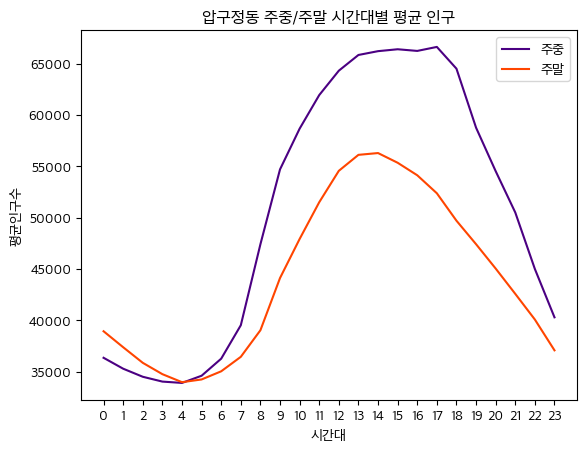

In [10]:
plt.rc('font', family='Apple SD Gothic Neo')
plt.title(dong_name + ' Ï£ºÏ§ë/Ï£ºÎßê ÏãúÍ∞ÑÎåÄÎ≥Ñ ÌèâÍ∑† Ïù∏Íµ¨')
plt.plot(range(24), weekday, color='indigo', label='Ï£ºÏ§ë')
plt.plot(range(24), weekend, color='orangered', label='Ï£ºÎßê')
plt.legend()
plt.xlabel('ÏãúÍ∞ÑÎåÄ')
plt.ylabel('ÌèâÍ∑†Ïù∏Íµ¨Ïàò')
plt.xticks(range(24), range(24))
plt.show()

In [11]:
male = [0 for i in range(24)]
female = [0 for i in range(24)]

for row in data:
  if row[2] == dong_code:
    time = row[1]
    male[time] += sum(row[4:18])      # ÎÇ®ÏÑ± Ïù∏Íµ¨ Ï¥ùÌï© Íµ¨ÌïòÍ∏∞
    female[time] += sum(row[18:32])   # Ïó¨ÏÑ± Ïù∏Íµ¨ Ï¥ùÌï© Íµ¨ÌïòÍ∏∞
male = [m/31 for m in male]
female = [f/31 for f in female]

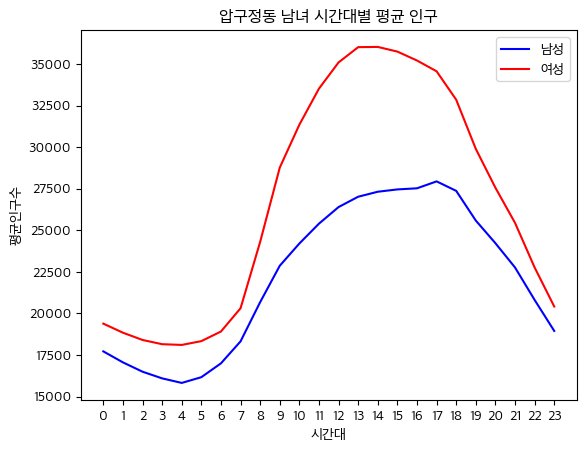

In [12]:
plt.rc('font', family='Apple SD Gothic Neo')
plt.title(dong_name + ' ÎÇ®ÎÖÄ ÏãúÍ∞ÑÎåÄÎ≥Ñ ÌèâÍ∑† Ïù∏Íµ¨')
plt.plot(range(24), male, color='b', label='ÎÇ®ÏÑ±')
plt.plot(range(24), female, color='r', label='Ïó¨ÏÑ±')
plt.xlabel('ÏãúÍ∞ÑÎåÄ')
plt.ylabel('ÌèâÍ∑†Ïù∏Íµ¨Ïàò')
plt.legend()
plt.xticks(range(24), range(24))
plt.show()

In [13]:
# Ìï´ÌîåÎ†àÏù¥Ïä§Í∞Ä ÏûàÎäî ÌñâÏ†ïÎèô
dong_name = input('Ìï´ÌîåÎ†àÏù¥Ïä§Í∞Ä ÏúÑÏπòÌïú ÌñâÏ†ïÎèôÏùÑ ÏûÖÎ†•ÌïòÏÑ∏Ïöî --> ')
for row in code_data:
  if row[-1] == dong_name:
    dong_code = row[1]

# ÎπÑÍµêÌï† ÌñâÏ†ïÎèô
dong_name2 = input('ÎπÑÍµêÌï† ÌñâÏ†ïÎèôÏùÑ ÏûÖÎ†•ÌïòÏÑ∏Ïöî --> ')
for row in code_data:
  if row[-1] == dong_name2:
    dong_code2 = row[1]

In [14]:
population = [0 for i in range(24)]
population2 = [0 for i in range(24)]

for row in data:
  # Ìï´ÌîåÎ†àÏù¥Ïä§Í∞Ä ÏûàÎäî ÌñâÏ†ïÎèôÏù∏ Í≤ΩÏö∞
  if row[2] == dong_code:
    time, p = row[1], row[3]
    population[time] += p

  # ÎπÑÍµêÌï† ÏßÄÏó≠Ïùò ÌñâÏ†ïÎèôÏù∏ Í≤ΩÏö∞
  elif row[2] == dong_code2:
    time, p = row[1], row[3]
    population2[time] += p

population = [p/31 for p in population]
population2 = [p/31 for p in population2]

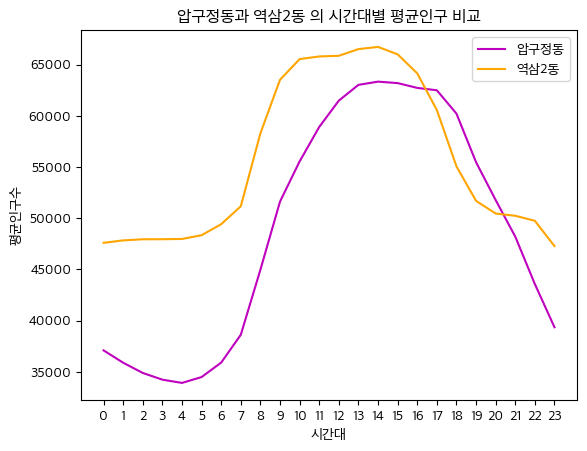

In [15]:
plt.rc('font', family='Apple SD Gothic Neo')
plt.title(dong_name + 'Í≥º '+dong_name2+' Ïùò ÏãúÍ∞ÑÎåÄÎ≥Ñ ÌèâÍ∑†Ïù∏Íµ¨ ÎπÑÍµê')
plt.plot(range(24), population, color='m', label=dong_name)
plt.plot(range(24), population2, color='orange', label=dong_name2)
plt.legend()
plt.xlabel('ÏãúÍ∞ÑÎåÄ')
plt.ylabel('ÌèâÍ∑†Ïù∏Íµ¨Ïàò')
plt.xticks(range(24), range(24))
plt.show()

In [36]:
import csv

with open("./data/LOCAL_PEOPLE_DONG_201912.csv", encoding="utf-8-sig") as f:
  data = csv.reader(f)
  next(data)
  data = list(data)

print(data[0])

['20191201', '00', '11215710', '45694.998800000001', '452.3937', '208.7971', '1267.7678000000001', '5642.9234999999999', '5433.6800999999996', '2494.5992999999999', '1691.4830999999999', '1042.7095999999999', '1058.3378', '895.46389999999997', '875.9212', '601.90970000000004', '496.2165', '850.68200000000002', '388.40050000000002', '180.37209999999999', '1586.7039', '6973.6175999999996', '4259.7021999999997', '2036.1446000000001', '1285.4200000000001', '794.6241', '833.71789999999999', '772.14170000000001', '773.21519999999998', '827.14549999999997', '565.53779999999995', '1405.3706999999999', '']


In [37]:
with open("./data/dong_code.csv", encoding="utf-8-sig") as f1:
  code_data = csv.reader(f1)
  next(code_data)
  next(code_data)
  code_data = list(code_data)

print(len(code_data))

424


In [38]:
for row in data:
  for i in range(1, 32):
    if i <= 2:
      row[i] = int(row[i])
    else:
      row[i] = float(row[i])

print(data[0])

['20191201', 0, 11215710, 45694.9988, 452.3937, 208.7971, 1267.7678, 5642.9235, 5433.6801, 2494.5993, 1691.4831, 1042.7096, 1058.3378, 895.4639, 875.9212, 601.9097, 496.2165, 850.682, 388.4005, 180.3721, 1586.7039, 6973.6176, 4259.7022, 2036.1446, 1285.42, 794.6241, 833.7179, 772.1417, 773.2152, 827.1455, 565.5378, 1405.3707, '']


In [39]:
for row in code_data:
  row[1] = int(row[1])

print(code_data[0])

['1101053', 11110530, 'ÏÑúÏö∏', 'Ï¢ÖÎ°úÍµ¨', 'ÏÇ¨ÏßÅÎèô']


In [13]:
# Ìï´ÌîåÎ†àÏù¥Ïä§Í∞Ä ÏûàÎäî ÌñâÏ†ïÎèô
cnt = int(input("ÎπÑÍµêÌï† ÌñâÏ†ïÎèôÏùò Í∞úÏàòÎ•º ÏûÖÎ†•ÌïòÏÉàÏöî : "))
dong_name = []
dong_code = []

for _ in range(cnt):
  dong_name.append(input('Ìï´ÌîåÎ†àÏù¥Ïä§Í∞Ä ÏúÑÏπòÌïú ÌñâÏ†ïÎèôÏùÑ ÏûÖÎ†•ÌïòÏÑ∏Ïöî : '))

for i in range(cnt):
  for row in code_data:
    if row[-1] == dong_name[i]:
      dong_code.append(int(row[1]))

In [ ]:
# Ìï´ÌîåÎ†àÏù¥Ïä§Í∞Ä ÏûàÎäî ÌñâÏ†ïÎèô
cnt = int(input("ÎπÑÍµêÌï† ÌñâÏ†ïÎèôÏùò Í∞úÏàòÎ•º ÏûÖÎ†•ÌïòÏÉàÏöî : "))
dong_name = []
dong_code = []

for _ in range(cnt):
  dong_name.append(input('Ìï´ÌîåÎ†àÏù¥Ïä§Í∞Ä ÏúÑÏπòÌïú ÌñâÏ†ïÎèôÏùÑ ÏûÖÎ†•ÌïòÏÑ∏Ïöî : '))

for i in range(cnt):
  for row in code_data:
    if row[-1] == dong_name[i]:
      dong_code.append(int(row[1]))

# populations Î¶¨Ïä§Ìä∏ Ï¥àÍ∏∞Ìôî ÏàòÏ†ï (Ï§ëÏöî!)
populations = [[0 for i in range(24)] for _ in range(cnt)]

for row in data:
  # Ìï´ÌîåÎ†àÏù¥Ïä§Í∞Ä ÏûàÎäî ÌñâÏ†ïÎèôÏù∏ Í≤ΩÏö∞
  if row[2] in dong_code:
    dong_idx = dong_code.index(row[2])
    time = int(row[1])  # ÏãúÍ∞ÑÏùÑ Ï†ïÏàòÎ°ú Î≥ÄÌôò
    p = int(row[3])  # Ïù∏Íµ¨Î•º Ï†ïÏàòÎ°ú Î≥ÄÌôò
    populations[dong_idx][time] += p

# 31ÏùºÎ°ú ÎÇòÎàÑÏñ¥ ÌèâÍ∑† Í≥ÑÏÇ∞
for i in range(len(populations)):
  populations[i] = [p/31 for p in populations[i]]

print(populations)

[[37097.967741935485, 35891.3870967742, 34892.74193548387, 34238.58064516129, 33919.87096774193, 34494.032258064515, 35905.0, 38626.41935483871, 44979.1935483871, 51633.12903225807, 55553.6129032258, 58915.87096774193, 61491.87096774193, 63030.290322580644, 63344.41935483871, 63202.0, 62732.83870967742, 62499.903225806454, 60219.967741935485, 55474.645161290326, 51779.32258064516, 48205.67741935484, 43569.87096774193, 39357.77419354839], [30727.16129032258, 30485.290322580644, 30155.90322580645, 29643.677419354837, 29298.967741935485, 29418.0, 30867.0, 33869.48387096774, 35454.903225806454, 37637.032258064515, 39011.93548387097, 39982.41935483871, 40374.16129032258, 41956.16129032258, 42527.903225806454, 42584.77419354839, 42753.8064516129, 42151.290322580644, 41864.290322580644, 40614.51612903226, 39345.74193548387, 37916.77419354839, 34887.45161290323, 31264.1935483871]]


[[37097.967741935485, 35891.3870967742, 34892.74193548387, 34238.58064516129, 33919.87096774193, 34494.032258064515, 35905.0, 38626.41935483871, 44979.1935483871, 51633.12903225807, 55553.6129032258, 58915.87096774193, 61491.87096774193, 63030.290322580644, 63344.41935483871, 63202.0, 62732.83870967742, 62499.903225806454, 60219.967741935485, 55474.645161290326, 51779.32258064516, 48205.67741935484, 43569.87096774193, 39357.77419354839], [47603.45161290323, 47839.58064516129, 47949.32258064516, 47953.0, 47980.096774193546, 48346.48387096774, 49424.967741935485, 51171.22580645161, 58301.032258064515, 63526.67741935484, 65546.32258064517, 65804.83870967742, 65869.54838709677, 66524.45161290323, 66735.2258064516, 66011.80645161291, 64152.032258064515, 60569.41935483871, 55070.48387096774, 51697.77419354839, 50464.93548387097, 50244.45161290323, 49752.77419354839, 47279.3870967742]]


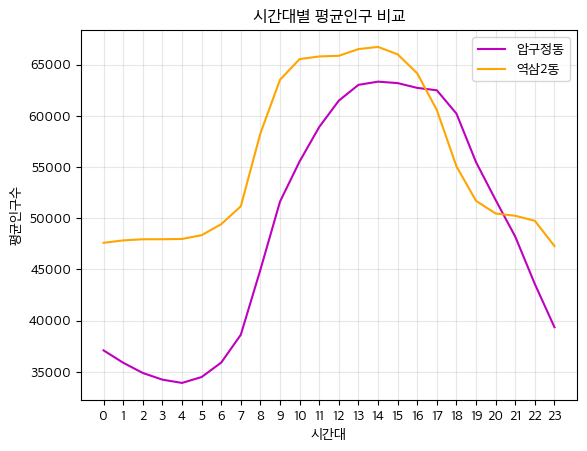

In [10]:
import matplotlib.pyplot as plt

# Ìï´ÌîåÎ†àÏù¥Ïä§Í∞Ä ÏûàÎäî ÌñâÏ†ïÎèô
cnt = int(input("ÎπÑÍµêÌï† ÌñâÏ†ïÎèôÏùò Í∞úÏàòÎ•º ÏûÖÎ†•ÌïòÏÉàÏöî : "))
dong_name = []
dong_code = []

for _ in range(cnt):
  dong_name.append(input('Ìï´ÌîåÎ†àÏù¥Ïä§Í∞Ä ÏúÑÏπòÌïú ÌñâÏ†ïÎèôÏùÑ ÏûÖÎ†•ÌïòÏÑ∏Ïöî : '))

for i in range(cnt):
  for row in code_data:
    if row[-1] == dong_name[i]:
      dong_code.append(int(row[1]))

# populations Î¶¨Ïä§Ìä∏ Ï¥àÍ∏∞Ìôî ÏàòÏ†ï (Ï§ëÏöî!)
populations = [[0 for i in range(24)] for _ in range(cnt)]

for row in data:
  # Ìï´ÌîåÎ†àÏù¥Ïä§Í∞Ä ÏûàÎäî ÌñâÏ†ïÎèôÏù∏ Í≤ΩÏö∞
  if row[2] in dong_code:
    dong_idx = dong_code.index(row[2])
    time = int(row[1])  # ÏãúÍ∞ÑÏùÑ Ï†ïÏàòÎ°ú Î≥ÄÌôò
    p = int(row[3])  # Ïù∏Íµ¨Î•º Ï†ïÏàòÎ°ú Î≥ÄÌôò
    populations[dong_idx][time] += p

# 31ÏùºÎ°ú ÎÇòÎàÑÏñ¥ ÌèâÍ∑† Í≥ÑÏÇ∞
for i in range(len(populations)):
  populations[i] = [p/31 for p in populations[i]]

print(populations)

plt.rc('font', family='Apple SD Gothic Neo')
plt.title('ÏãúÍ∞ÑÎåÄÎ≥Ñ ÌèâÍ∑†Ïù∏Íµ¨ ÎπÑÍµê')

# Ïó¨Îü¨ ÌñâÏ†ïÎèôÏùÑ ÎèôÏ†ÅÏúºÎ°ú Í∑∏ÎûòÌîÑÏóê Ï∂îÍ∞Ä
colors = ['m', 'orange', 'blue', 'green', 'red', 'purple', 'brown', 'pink']
for i in range(cnt):
  plt.plot(range(24), populations[i], color=colors[i %
           len(colors)], label=dong_name[i])

plt.legend()
plt.xlabel('ÏãúÍ∞ÑÎåÄ')
plt.ylabel('ÌèâÍ∑†Ïù∏Íµ¨Ïàò')
plt.xticks(range(24), range(24))
plt.grid(True, alpha=0.3)  # Í∑∏Î¶¨Îìú Ï∂îÍ∞Ä (ÏÑ†ÌÉùÏÇ¨Ìï≠)
plt.show()

In [29]:
# Ìï´ÌîåÎ†àÏù¥Ïä§Í∞Ä ÏûàÎäî ÌñâÏ†ïÎèô
dong_name = list(input("ÎπÑÍµêÌï† ÌñâÏ†ïÎèôÏùÑ Í≥µÎ∞±Î¨∏ÏûêÎ°ú Íµ¨Î∂ÑÌïòÏó¨ ÏûÖÎ†•ÌïòÏÉàÏöî : ").split())
dong_code = []

for i in range(len(dong_name)):
  for row in code_data:
    if row[-1] == dong_name[i]:
      dong_code.append(int(row[1]))

In [ ]:
# Ìï´ÌîåÎ†àÏù¥Ïä§Í∞Ä ÏûàÎäî ÌñâÏ†ïÎèô
dong_name = list(input("ÎπÑÍµêÌï† ÌñâÏ†ïÎèôÏùÑ Í≥µÎ∞±Î¨∏ÏûêÎ°ú Íµ¨Î∂ÑÌïòÏó¨ ÏûÖÎ†•ÌïòÏÉàÏöî : ").split())
dong_code = []

for i in range(len(dong_name)):
  for row in code_data:
    if row[-1] == dong_name[i]:
      dong_code.append(int(row[1]))

# populations Î¶¨Ïä§Ìä∏ Ï¥àÍ∏∞Ìôî ÏàòÏ†ï (Ï§ëÏöî!)
populations = [[0 for i in range(24)] for _ in range(len(dong_name))]

for row in data:
  # Ìï´ÌîåÎ†àÏù¥Ïä§Í∞Ä ÏûàÎäî ÌñâÏ†ïÎèôÏù∏ Í≤ΩÏö∞
  if row[2] in dong_code:
    dong_idx = dong_code.index(row[2])
    time = int(row[1])  # ÏãúÍ∞ÑÏùÑ Ï†ïÏàòÎ°ú Î≥ÄÌôò
    p = int(row[3])  # Ïù∏Íµ¨Î•º Ï†ïÏàòÎ°ú Î≥ÄÌôò
    populations[dong_idx][time] += p

# 31ÏùºÎ°ú ÎÇòÎàÑÏñ¥ ÌèâÍ∑† Í≥ÑÏÇ∞
for i in range(len(populations)):
  populations[i] = [p/31 for p in populations[i]]

print(populations)

NameError: name 'dong_name' is not defined

[[37097.967741935485, 35891.3870967742, 34892.74193548387, 34238.58064516129, 33919.87096774193, 34494.032258064515, 35905.0, 38626.41935483871, 44979.1935483871, 51633.12903225807, 55553.6129032258, 58915.87096774193, 61491.87096774193, 63030.290322580644, 63344.41935483871, 63202.0, 62732.83870967742, 62499.903225806454, 60219.967741935485, 55474.645161290326, 51779.32258064516, 48205.67741935484, 43569.87096774193, 39357.77419354839], [73943.41935483871, 71203.64516129032, 69386.16129032258, 68416.96774193548, 67901.35483870968, 68171.87096774194, 71209.19354838709, 80586.58064516129, 102767.64516129032, 127389.35483870968, 140544.2258064516, 150267.48387096773, 157289.38709677418, 161293.1935483871, 162429.51612903227, 160459.74193548388, 156438.7741935484, 150152.16129032258, 138507.38709677418, 128039.6129032258, 117964.45161290323, 104861.87096774194, 89687.3870967742, 78661.93548387097], [47603.45161290323, 47839.58064516129, 47949.32258064516, 47953.0, 47980.096774193546, 4834

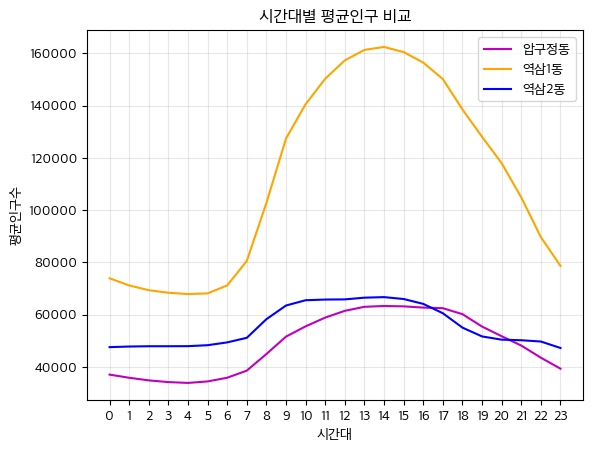

In [6]:
# Ìï´ÌîåÎ†àÏù¥Ïä§Í∞Ä ÏûàÎäî ÌñâÏ†ïÎèô
import matplotlib.pyplot as plt
dong_name = list(input("ÎπÑÍµêÌï† ÌñâÏ†ïÎèôÏùÑ Í≥µÎ∞±Î¨∏ÏûêÎ°ú Íµ¨Î∂ÑÌïòÏó¨ ÏûÖÎ†•ÌïòÏÑ∏Ïöî : ").split())
dong_code = []

for i in range(len(dong_name)):
  for row in code_data:
    if row[-1] == dong_name[i]:
      dong_code.append(int(row[1]))

# populations Î¶¨Ïä§Ìä∏ Ï¥àÍ∏∞Ìôî ÏàòÏ†ï (Ï§ëÏöî!)
populations = [[0 for i in range(24)] for _ in range(len(dong_name))]

for row in data:
  # Ìï´ÌîåÎ†àÏù¥Ïä§Í∞Ä ÏûàÎäî ÌñâÏ†ïÎèôÏù∏ Í≤ΩÏö∞
  if row[2] in dong_code:
    dong_idx = dong_code.index(row[2])
    time = int(row[1])  # ÏãúÍ∞ÑÏùÑ Ï†ïÏàòÎ°ú Î≥ÄÌôò
    p = int(row[3])  # Ïù∏Íµ¨Î•º Ï†ïÏàòÎ°ú Î≥ÄÌôò
    populations[dong_idx][time] += p

# 31ÏùºÎ°ú ÎÇòÎàÑÏñ¥ ÌèâÍ∑† Í≥ÑÏÇ∞
for i in range(len(populations)):
  populations[i] = [p/31 for p in populations[i]]

print(populations)


plt.rc('font', family='Apple SD Gothic Neo')
plt.title('ÏãúÍ∞ÑÎåÄÎ≥Ñ ÌèâÍ∑†Ïù∏Íµ¨ ÎπÑÍµê')

# Ïó¨Îü¨ ÌñâÏ†ïÎèôÏùÑ ÎèôÏ†ÅÏúºÎ°ú Í∑∏ÎûòÌîÑÏóê Ï∂îÍ∞Ä
colors = ['m', 'orange', 'blue', 'green', 'red', 'purple', 'brown', 'pink']
for i in range(len(dong_name)):
  plt.plot(range(24), populations[i], color=colors[i %
           len(colors)], label=dong_name[i])

plt.legend()
plt.xlabel('ÏãúÍ∞ÑÎåÄ')
plt.ylabel('ÌèâÍ∑†Ïù∏Íµ¨Ïàò')
plt.xticks(range(24), range(24))
plt.grid(True, alpha=0.3)  # Í∑∏Î¶¨Îìú Ï∂îÍ∞Ä (ÏÑ†ÌÉùÏÇ¨Ìï≠)
plt.show()

In [1]:
import csv

with open("./data/LOCAL_PEOPLE_DONG_201912.csv", encoding="utf-8-sig") as f:
  data = csv.reader(f)
  next(data)
  data = list(data)

print(data[0])

['20191201', '00', '11215710', '45694.998800000001', '452.3937', '208.7971', '1267.7678000000001', '5642.9234999999999', '5433.6800999999996', '2494.5992999999999', '1691.4830999999999', '1042.7095999999999', '1058.3378', '895.46389999999997', '875.9212', '601.90970000000004', '496.2165', '850.68200000000002', '388.40050000000002', '180.37209999999999', '1586.7039', '6973.6175999999996', '4259.7021999999997', '2036.1446000000001', '1285.4200000000001', '794.6241', '833.71789999999999', '772.14170000000001', '773.21519999999998', '827.14549999999997', '565.53779999999995', '1405.3706999999999', '']


In [2]:
with open("./data/dong_code.csv", encoding="utf-8-sig") as f1:
  code_data = csv.reader(f1)
  next(code_data)
  next(code_data)
  code_data = list(code_data)

print(len(code_data))

424


In [3]:
for row in data:
  for i in range(1, 32):
    if i <= 2:
      row[i] = int(row[i])
    else:
      row[i] = float(row[i])

print(data[0])

['20191201', 0, 11215710, 45694.9988, 452.3937, 208.7971, 1267.7678, 5642.9235, 5433.6801, 2494.5993, 1691.4831, 1042.7096, 1058.3378, 895.4639, 875.9212, 601.9097, 496.2165, 850.682, 388.4005, 180.3721, 1586.7039, 6973.6176, 4259.7022, 2036.1446, 1285.42, 794.6241, 833.7179, 772.1417, 773.2152, 827.1455, 565.5378, 1405.3707, '']


In [4]:
for row in code_data:
  row[1] = int(row[1])

print(code_data[0])

['1101053', 11110530, 'ÏÑúÏö∏', 'Ï¢ÖÎ°úÍµ¨', 'ÏÇ¨ÏßÅÎèô']


In [7]:
import sys
from PyQt5.QtWidgets import (QApplication, QMainWindow, QWidget, QVBoxLayout,
                             QHBoxLayout, QLabel, QLineEdit, QPushButton,
                             QTextEdit, QMessageBox, QGroupBox, QSplitter)
from PyQt5.QtCore import Qt
from PyQt5.QtGui import QFont
import matplotlib.pyplot as plt
from matplotlib.backends.backend_qt5agg import FigureCanvasQTAgg as FigureCanvas
from matplotlib.figure import Figure

import csv

with open("./data/LOCAL_PEOPLE_DONG_201912.csv", encoding="utf-8-sig") as f:
  data = csv.reader(f)
  next(data)
  data = list(data)

with open("./data/dong_code.csv", encoding="utf-8-sig") as f1:
  code_data = csv.reader(f1)
  next(code_data)
  next(code_data)
  code_data = list(code_data)

for row in data:
  for i in range(1, 32):
    if i <= 2:
      row[i] = int(row[i])
    else:
      row[i] = float(row[i])

for row in code_data:
  row[1] = int(row[1])


class MplCanvas(FigureCanvas):
  def __init__(self, parent=None, width=5, height=4, dpi=100):
    self.fig = Figure(figsize=(width, height), dpi=dpi)
    self.axes = self.fig.add_subplot(111)
    super(MplCanvas, self).__init__(self.fig)


class PopulationAnalysisApp(QMainWindow):
  def __init__(self):
    super().__init__()
    self.canvas = None
    self.init_ui()

  def init_ui(self):
    # ÏúàÎèÑÏö∞ ÏÑ§Ï†ï
    self.setWindowTitle('ÌñâÏ†ïÎèô Ïù∏Íµ¨ ÎπÑÍµê Î∂ÑÏÑù')
    self.setGeometry(100, 100, 1200, 700)

    # Ï§ëÏïô ÏúÑÏ†Ø ÏÑ§Ï†ï
    central_widget = QWidget()
    self.setCentralWidget(central_widget)

    # Î©îÏù∏ Î†àÏù¥ÏïÑÏõÉ
    main_layout = QVBoxLayout()
    main_layout.setSpacing(15)
    main_layout.setContentsMargins(20, 20, 20, 20)

    # Ï†úÎ™©
    title_label = QLabel('ÏãúÍ∞ÑÎåÄÎ≥Ñ ÌèâÍ∑†Ïù∏Íµ¨ ÎπÑÍµê Î∂ÑÏÑù')
    title_font = QFont('Arial', 18, QFont.Bold)
    title_label.setFont(title_font)
    title_label.setAlignment(Qt.AlignCenter)
    title_label.setStyleSheet("color: #2c3e50; margin: 10px 0;")
    main_layout.addWidget(title_label)

    # ÏûÖÎ†• Í∑∏Î£πÎ∞ïÏä§
    input_group = QGroupBox("ÌñâÏ†ïÎèô ÏûÖÎ†•")
    input_group.setStyleSheet("""
            QGroupBox {
                font-size: 13px;
                font-weight: bold;
                color: #2c3e50;
                border: 2px solid #3498db;
                border-radius: 5px;
                margin-top: 10px;
                padding-top: 10px;
            }
            QGroupBox::title {
                subcontrol-origin: margin;
                left: 10px;
                padding: 0 5px 0 5px;
            }
        """)
    input_layout = QVBoxLayout()

    # ÏïàÎÇ¥ Î†àÏù¥Î∏î
    instruction_label = QLabel('ÎπÑÍµêÌï† ÌñâÏ†ïÎèôÏùÑ Í≥µÎ∞±Î¨∏ÏûêÎ°ú Íµ¨Î∂ÑÌïòÏó¨ ÏûÖÎ†•ÌïòÏÑ∏Ïöî:')
    instruction_label.setStyleSheet(
        "color: #34495e; font-size: 11px; border: none;")
    input_layout.addWidget(instruction_label)

    # ÏûÖÎ†• ÌïÑÎìú
    self.entry = QLineEdit()
    self.entry.setPlaceholderText("Ïòà: Í∞ïÎÇ®Íµ¨ ÏÑúÏ¥àÍµ¨ ÏÜ°ÌååÍµ¨")
    self.entry.setFont(QFont('Arial', 12))
    self.entry.setStyleSheet("""
            QLineEdit {
                padding: 10px;
                border: 2px solid #bdc3c7;
                border-radius: 5px;
                background-color: white;
                color: #000000;
            }
            QLineEdit:focus {
                border: 2px solid #3498db;
            }
        """)
    self.entry.returnPressed.connect(self.analyze_and_plot)
    input_layout.addWidget(self.entry)

    # Î≤ÑÌäº Î†àÏù¥ÏïÑÏõÉ
    button_layout = QHBoxLayout()

    # Î∂ÑÏÑù Î≤ÑÌäº
    self.analyze_button = QPushButton('Î∂ÑÏÑù Î∞è Í∑∏ÎûòÌîÑ Î≥¥Í∏∞')
    self.analyze_button.setFont(QFont('Arial', 11, QFont.Bold))
    self.analyze_button.setStyleSheet("""
            QPushButton {
                background-color: #27ae60;
                color: white;
                padding: 12px 24px;
                border: none;
                border-radius: 5px;
                font-size: 12px;
            }
            QPushButton:hover {
                background-color: #229954;
            }
            QPushButton:pressed {
                background-color: #1e8449;
            }
        """)
    self.analyze_button.clicked.connect(self.analyze_and_plot)
    button_layout.addWidget(self.analyze_button)

    # Ï¥àÍ∏∞Ìôî Î≤ÑÌäº
    self.clear_button = QPushButton('Ï¥àÍ∏∞Ìôî')
    self.clear_button.setFont(QFont('Arial', 11))
    self.clear_button.setStyleSheet("""
            QPushButton {
                background-color: #e74c3c;
                color: white;
                padding: 12px 24px;
                border: none;
                border-radius: 5px;
                font-size: 12px;
            }
            QPushButton:hover {
                background-color: #c0392b;
            }
            QPushButton:pressed {
                background-color: #a93226;
            }
        """)
    self.clear_button.clicked.connect(self.clear_input)
    button_layout.addWidget(self.clear_button)

    button_layout.addStretch()
    input_layout.addLayout(button_layout)

    input_group.setLayout(input_layout)
    main_layout.addWidget(input_group)

    # Ïä§ÌîåÎ¶¨ÌÑ∞Î°ú Í≤∞Í≥ºÏôÄ Í∑∏ÎûòÌîÑ ÏòÅÏó≠ Î∂ÑÌï†
    splitter = QSplitter(Qt.Horizontal)

    # Í≤∞Í≥º Í∑∏Î£πÎ∞ïÏä§ (ÏôºÏ™Ω)
    result_group = QGroupBox("Î∂ÑÏÑù Í≤∞Í≥º")
    result_group.setStyleSheet("""
            QGroupBox {
                font-size: 13px;
                font-weight: bold;
                color: #2c3e50;
                border: 2px solid #9b59b6;
                border-radius: 5px;
                margin-top: 10px;
                padding-top: 10px;
            }
            QGroupBox::title {
                subcontrol-origin: margin;
                left: 10px;
                padding: 0 5px 0 5px;
            }
        """)
    result_layout = QVBoxLayout()

    # Í≤∞Í≥º ÌÖçÏä§Ìä∏ ÏòÅÏó≠
    self.result_text = QTextEdit()
    self.result_text.setReadOnly(True)
    self.result_text.setFont(QFont('Courier', 10))
    self.result_text.setStyleSheet("""
            QTextEdit {
                background-color: #ffffff;
                color: #000000;
                border: 1px solid #dee2e6;
                border-radius: 5px;
                padding: 10px;
            }
        """)
    result_layout.addWidget(self.result_text)
    result_group.setLayout(result_layout)

    # Í∑∏ÎûòÌîÑ Í∑∏Î£πÎ∞ïÏä§ (Ïò§Î•∏Ï™Ω)
    graph_group = QGroupBox("Í∑∏ÎûòÌîÑ")
    graph_group.setStyleSheet("""
            QGroupBox {
                font-size: 13px;
                font-weight: bold;
                color: #2c3e50;
                border: 2px solid #e67e22;
                border-radius: 5px;
                margin-top: 10px;
                padding-top: 10px;
            }
            QGroupBox::title {
                subcontrol-origin: margin;
                left: 10px;
                padding: 0 5px 0 5px;
            }
        """)
    self.graph_layout = QVBoxLayout()

    # Ï¥àÍ∏∞ ÏïàÎÇ¥ Î©îÏãúÏßÄ
    self.placeholder_label = QLabel("Î∂ÑÏÑùÏùÑ Ïã§ÌñâÌïòÎ©¥ Ïó¨Í∏∞Ïóê Í∑∏ÎûòÌîÑÍ∞Ä ÌëúÏãúÎê©ÎãàÎã§.")
    self.placeholder_label.setAlignment(Qt.AlignCenter)
    self.placeholder_label.setStyleSheet(
        "color: #95a5a6; font-size: 14px; border: none;")
    self.graph_layout.addWidget(self.placeholder_label)

    graph_group.setLayout(self.graph_layout)

    # Ïä§ÌîåÎ¶¨ÌÑ∞Ïóê ÏúÑÏ†Ø Ï∂îÍ∞Ä
    splitter.addWidget(result_group)
    splitter.addWidget(graph_group)
    splitter.setSizes([400, 700])  # Ï¥àÍ∏∞ ÌÅ¨Í∏∞ ÎπÑÏú®

    main_layout.addWidget(splitter)

    # ÌïòÎã® ÏïàÎÇ¥ Î©îÏãúÏßÄ
    hint_label = QLabel('üí° Tip: ÏûÖÎ†• ÌõÑ Enter ÌÇ§Î•º ÎàåÎü¨ÎèÑ Î∂ÑÏÑùÏù¥ Ïã§ÌñâÎê©ÎãàÎã§')
    hint_label.setStyleSheet(
        "color: #7f8c8d; font-size: 10px; font-style: italic;")
    hint_label.setAlignment(Qt.AlignCenter)
    main_layout.addWidget(hint_label)

    central_widget.setLayout(main_layout)

    # ÏúàÎèÑÏö∞ Ïä§ÌÉÄÏùº
    self.setStyleSheet("""
            QMainWindow {
                background-color: #ecf0f1;
            }
        """)

  def analyze_and_plot(self):
    # ÏûÖÎ†•Í∞í Í∞ÄÏ†∏Ïò§Í∏∞
    input_text = self.entry.text().strip()

    if not input_text:
      QMessageBox.warning(self, "ÏûÖÎ†• Ïò§Î•ò", "ÌñâÏ†ïÎèô Ïù¥Î¶ÑÏùÑ ÏûÖÎ†•Ìï¥Ï£ºÏÑ∏Ïöî!")
      return

    # ÌñâÏ†ïÎèô Ïù¥Î¶Ñ ÌååÏã±
    dong_name = input_text.split()

    # code_dataÏôÄ dataÍ∞Ä ÎπÑÏñ¥ÏûàÎäîÏßÄ ÌôïÏù∏
    if not code_data or not data:
      QMessageBox.critical(self, "Îç∞Ïù¥ÌÑ∞ Ïò§Î•ò",
                           "Îç∞Ïù¥ÌÑ∞Í∞Ä Î°úÎìúÎêòÏßÄ ÏïäÏïòÏäµÎãàÎã§.\n"
                           "code_dataÏôÄ data Î≥ÄÏàòÎ•º Î®ºÏ†Ä Î°úÎìúÌï¥Ï£ºÏÑ∏Ïöî!")
      return

    # ÌñâÏ†ïÎèô ÏΩîÎìú Ï∞æÍ∏∞
    dong_code = []
    for i in range(len(dong_name)):
      found = False
      for row in code_data:
        if row[-1] == dong_name[i]:
          dong_code.append(int(row[1]))
          found = True
          break
      if not found:
        QMessageBox.critical(self, "Ïò§Î•ò",
                             f"'{dong_name[i]}'ÏùÑ(Î•º) Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§!")
        return

    # populations Î¶¨Ïä§Ìä∏ Ï¥àÍ∏∞Ìôî
    populations = [[0 for i in range(24)] for _ in range(len(dong_name))]

    # Îç∞Ïù¥ÌÑ∞ ÏßëÍ≥Ñ
    for row in data:
      # Ìï´ÌîåÎ†àÏù¥Ïä§Í∞Ä ÏûàÎäî ÌñâÏ†ïÎèôÏù∏ Í≤ΩÏö∞
      if row[2] in dong_code:
        dong_idx = dong_code.index(row[2])
        time = int(row[1])  # ÏãúÍ∞ÑÏùÑ Ï†ïÏàòÎ°ú Î≥ÄÌôò
        p = int(row[3])  # Ïù∏Íµ¨Î•º Ï†ïÏàòÎ°ú Î≥ÄÌôò
        populations[dong_idx][time] += p

    # 31ÏùºÎ°ú ÎÇòÎàÑÏñ¥ ÌèâÍ∑† Í≥ÑÏÇ∞
    for i in range(len(populations)):
      populations[i] = [p/31 for p in populations[i]]

    # Í≤∞Í≥º Ï∂úÎ†• ÏòÅÏó≠Ïóê ÌëúÏãú
    self.result_text.clear()
    result_html = "<h3 style='color: #2c3e50;'>ÏãúÍ∞ÑÎåÄÎ≥Ñ ÌèâÍ∑† Ïù∏Íµ¨ Îç∞Ïù¥ÌÑ∞</h3>"
    result_html += "<hr style='border: 1px solid #bdc3c7;'>"

    for i, name in enumerate(dong_name):
      result_html += f"<h4 style='color: #3498db;'>üìç {name}</h4>"
      result_html += "<table style='width: 100%; border-collapse: collapse; margin-bottom: 20px;'>"

      # Îç∞Ïù¥ÌÑ∞Î•º Î≥¥Í∏∞ Ï¢ãÍ≤å Ìè¨Îß∑
      for j in range(0, 24, 6):
        time_range = f"{j:02d}~{j+5:02d}Ïãú"
        result_html += f"<tr><td style='padding: 5px; background-color: #ecf0f1; font-weight: bold; color: #2c3e50;'>{time_range}</td>"

        for k in range(j, min(j+6, 24)):
          value = populations[i][k]
          result_html += f"<td style='padding: 5px; text-align: center; color: #000000;'>{value:.1f}</td>"
        result_html += "</tr>"

      result_html += "</table>"

    self.result_text.setHtml(result_html)

    # Í∏∞Ï°¥ Ï∫îÎ≤ÑÏä§ Ï†úÍ±∞
    if self.canvas is not None:
      self.graph_layout.removeWidget(self.canvas)
      self.canvas.deleteLater()
      self.canvas = None

    # placeholder Î†àÏù¥Î∏î Ïà®Í∏∞Í∏∞
    self.placeholder_label.hide()

    # ÏÉà Ï∫îÎ≤ÑÏä§ ÏÉùÏÑ± Î∞è Í∑∏ÎûòÌîÑ Í∑∏Î¶¨Í∏∞
    self.canvas = MplCanvas(self, width=8, height=6, dpi=100)

    # ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï
    try:
      plt.rcParams['font.family'] = 'Apple SD Gothic Neo'
    except:
      try:
        plt.rcParams['font.family'] = 'Malgun Gothic'
      except:
        pass

    plt.rcParams['axes.unicode_minus'] = False

    # Í∑∏ÎûòÌîÑ Í∑∏Î¶¨Í∏∞
    self.canvas.axes.clear()
    self.canvas.axes.set_title(
        'ÏãúÍ∞ÑÎåÄÎ≥Ñ ÌèâÍ∑†Ïù∏Íµ¨ ÎπÑÍµê', fontsize=14, fontweight='bold', pad=15)

    # Ïó¨Îü¨ ÌñâÏ†ïÎèôÏùÑ ÎèôÏ†ÅÏúºÎ°ú Í∑∏ÎûòÌîÑÏóê Ï∂îÍ∞Ä
    colors = ['#9b59b6', '#e74c3c', '#3498db', '#2ecc71', '#f39c12',
              '#1abc9c', '#e67e22', '#34495e']
    for i in range(len(dong_name)):
      self.canvas.axes.plot(range(24), populations[i],
                            color=colors[i % len(colors)],
                            label=dong_name[i],
                            marker='o',
                            linewidth=2.5,
                            markersize=6)

    self.canvas.axes.legend(fontsize=10, loc='best', framealpha=0.9)
    self.canvas.axes.set_xlabel('ÏãúÍ∞ÑÎåÄ (Ïãú)', fontsize=11, fontweight='bold')
    self.canvas.axes.set_ylabel('ÌèâÍ∑†Ïù∏Íµ¨Ïàò (Î™Ö)', fontsize=11, fontweight='bold')
    self.canvas.axes.set_xticks(range(24))
    self.canvas.axes.grid(True, alpha=0.3, linestyle='--')
    self.canvas.fig.tight_layout()

    # Ï∫îÎ≤ÑÏä§Î•º Î†àÏù¥ÏïÑÏõÉÏóê Ï∂îÍ∞Ä
    self.graph_layout.addWidget(self.canvas)

    QMessageBox.information(self, "ÏôÑÎ£å", "Î∂ÑÏÑùÏù¥ ÏôÑÎ£åÎêòÏóàÏäµÎãàÎã§!")

  def clear_input(self):
    self.entry.clear()
    self.result_text.clear()

    # Í∑∏ÎûòÌîÑ Ï∫îÎ≤ÑÏä§ Ï†úÍ±∞
    if self.canvas is not None:
      self.graph_layout.removeWidget(self.canvas)
      self.canvas.deleteLater()
      self.canvas = None

    # placeholder Î†àÏù¥Î∏î Îã§Ïãú ÌëúÏãú
    self.placeholder_label.show()

    self.entry.setFocus()


def main():
  app = QApplication(sys.argv)

  # Ïï†ÌîåÎ¶¨ÏºÄÏù¥ÏÖò Ïä§ÌÉÄÏùº ÏÑ§Ï†ï
  app.setStyle('Fusion')

  window = PopulationAnalysisApp()
  window.show()

  sys.exit(app.exec_())


if __name__ == '__main__':
  main()

qt.qpa.fonts: Populating font family aliases took 99 ms. Replace uses of missing font family "Courier" with one that exists to avoid this cost. 
2025-10-14 11:36:32.938 Python[23125:3113069] TSM AdjustCapsLockLEDForKeyTransitionHandling - _ISSetPhysicalKeyboardCapsLockLED Inhibit
2025-10-14 11:36:32.940 Python[23125:3113069] error messaging the mach port for IMKCFRunLoopWakeUpReliable


SystemExit: 0

/Users/saintlee83/Documents/code/git_clones/Univ_Programming1/.venv/lib/python3.13/site-packages/IPython/core/interactiveshell.py:3707: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


# 13
